Clone the github **repository**

In [2]:
!git clone https://github.com/KhurramShahzadODM/face_and_emotion_detection.git

Cloning into 'face_and_emotion_detection'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 40 (delta 3), reused 35 (delta 2), pack-reused 0
Unpacking objects: 100% (40/40), done.


In [3]:
!pip install face_recognition


     |████████████████████████████████| 100.1 MB 25 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=7c40fdd6f99a4c627f397aa6d6fa31f71cbf664552465adbec5ea48ec3f8c123
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import shutil
import os
# clean and rebuild the image folders
input_folder = '/content/face_and_emotion_detection/inputs'
if os.path.exists(input_folder):
  shutil.rmtree(input_folder)
os.makedirs(input_folder)

output_folder = '/content/face_and_emotion_detection/outputs'
if os.path.exists(output_folder):
  shutil.rmtree(output_folder)
os.makedirs(output_folder)

# upload images (PNG or JPG)
image_names = list(files.upload().keys())
for image_name in image_names:
  shutil.move(image_name, os.path.join(input_folder, image_name))


Saving trump_speech_short.mp4 to trump_speech_short.mp4


In [4]:
from imutils import paths
import os
import cv2
import numpy as np
from google.colab import files
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import face_recognition
import keras
from keras.models import load_model
from google.colab.patches import cv2_imshow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam


imagePaths = list(paths.list_images('/content/face_and_emotion_detection/trump'))
# initialize the list of known encodings and known names
knownEncodings = []
knownNames = []
for (i, imagePath) in enumerate(imagePaths):
  # extract the person name from the image path
  print("[INFO] processing image {}/{}".format(i + 1,
    len(imagePaths)))
  name = imagePath.split(os.path.sep)[-2]
  # load the input image and convert it from BGR (OpenCV ordering)
  # to dlib ordering (RGB)
  image = cv2.imread(imagePath)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  boxes = face_recognition.face_locations(rgb,model="cnn")
  encodings = face_recognition.face_encodings(rgb, boxes)
  for encoding in encodings:
    # add each encoding + name to our set of known names and
    # encodings
    knownEncodings.append(encoding)
    knownNames.append(name)

[INFO] processing image 1/11
[INFO] processing image 2/11
[INFO] processing image 3/11
[INFO] processing image 4/11
[INFO] processing image 5/11
[INFO] processing image 6/11
[INFO] processing image 7/11
[INFO] processing image 8/11
[INFO] processing image 9/11
[INFO] processing image 10/11
[INFO] processing image 11/11


(194, 761, 251, 704)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(194, 761, 251, 704)


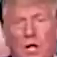

Fear
(194, 761, 251, 704)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(194, 761, 251, 704)


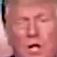

Fear
(194, 761, 251, 704)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(194, 761, 251, 704)


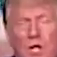

Fear
(194, 767, 251, 710)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(194, 767, 251, 710)


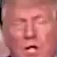

Fear
(200, 767, 257, 710)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(200, 767, 257, 710)


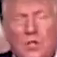

Fear
(200, 767, 257, 710)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(200, 767, 257, 710)


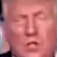

Fear
(200, 767, 257, 710)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(200, 767, 257, 710)


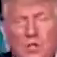

Fear
(200, 767, 257, 710)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(200, 767, 257, 710)


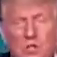

Fear
(206, 767, 263, 710)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(206, 767, 263, 710)


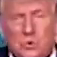

Happy
(206, 761, 263, 704)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(206, 761, 263, 704)


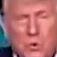

Fear
(206, 761, 263, 704)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(206, 761, 263, 704)


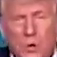

Fear
(206, 755, 263, 699)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(206, 755, 263, 699)


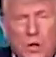

Fear
(206, 755, 263, 699)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(206, 755, 263, 699)


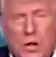

Fear
(200, 750, 257, 693)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(200, 750, 257, 693)


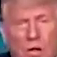

Fear
(206, 750, 263, 693)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(206, 750, 263, 693)


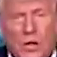

Fear
(200, 744, 257, 687)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(200, 744, 257, 687)


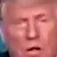

Fear
(200, 738, 257, 681)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(200, 738, 257, 681)


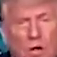

Fear
(200, 738, 257, 681)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(200, 738, 257, 681)


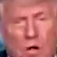

Fear
(200, 732, 257, 676)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(200, 732, 257, 676)


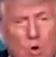

Fear
(200, 732, 257, 676)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(200, 732, 257, 676)


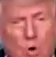

Fear
(200, 732, 257, 676)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(200, 732, 257, 676)


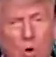

Fear
(206, 727, 263, 670)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(206, 727, 263, 670)


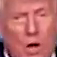

Fear
(206, 727, 263, 670)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(206, 727, 263, 670)


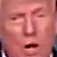

Fear
(206, 721, 263, 664)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(206, 721, 263, 664)


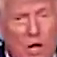

Fear
(206, 721, 263, 664)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(206, 721, 263, 664)


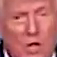

Fear
(221, 908, 268, 860)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(221, 908, 268, 860)


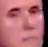

Happy
(216, 912, 263, 865)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(216, 912, 263, 865)


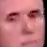

Fear
(216, 917, 263, 870)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(216, 917, 263, 870)


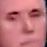

Angry
(212, 928, 268, 871)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(212, 928, 268, 871)


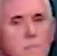

Angry
(216, 927, 263, 879)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(216, 927, 263, 879)


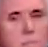

Angry
(212, 940, 268, 883)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(212, 940, 268, 883)


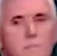

Fear
(212, 951, 268, 894)
[True, True, True, True, False, True, True, True, True, True, True, True]
12
11
(212, 951, 268, 894)


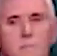

KeyboardInterrupt: ignored

In [5]:

# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('/content/face_and_emotion_detection/inputs/trump-1mint.mp4')
emotion_dict= {'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}

# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
# img = cv2.imread('/content/face_and_emotion_detection/inputs/473px-Donald_Trump_official_portrait.jpg', cv2.IMREAD_COLOR)

# cv2_imshow(img)
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    # Display the resulting frame
    # cv2_imshow(frame)
  
    faces = face_recognition.face_locations(frame,model="cnn")
    # print(len(face_locations))
    # plt.imshow(face_image1)
    trump_face = 0
    for face in faces:
      print(face)
      encoding_2 = face_recognition.face_encodings(frame, [face])
      matches = face_recognition.compare_faces(knownEncodings,encoding)
      print(matches)
      print(len(knownEncodings))
      print(sum(matches))
      if sum(matches) > 0:
        trump_face = face
        break
    print(trump_face)
    if(trump_face != 0):
      top, right, bottom, left = trump_face
      face_image = frame[top:bottom, left:right]
      cv2_imshow(face_image)
      face_image = cv2.resize(face_image, (48,48))
      face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
      face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])
      model = load_model("/content/face_and_emotion_detection/model/model_v6_23.hdf5")
      predicted_class = np.argmax(model.predict(face_image))
      label_map = dict((v,k) for k,v in emotion_dict.items()) 
      predicted_label = label_map[predicted_class]
      print(predicted_label)


      # results = face_recognition.compare_faces(knownEncodings, encoding_2,tolerance=0.5)
      # print(results)
      # if(results[0]):
      #   print('trump is in the frame')
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break

  # Break the loop
  else: 
    break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

In [ ]:
!zip /content/face.zip /content/face_and_emotion_detection/*

  adding: content/face_and_emotion_detection/inputs/ (stored 0%)
  adding: content/face_and_emotion_detection/LICENSE (deflated 41%)
  adding: content/face_and_emotion_detection/model/ (stored 0%)
  adding: content/face_and_emotion_detection/outputs/ (stored 0%)
  adding: content/face_and_emotion_detection/README.md (deflated 4%)
  adding: content/face_and_emotion_detection/test_images/ (stored 0%)
  adding: content/face_and_emotion_detection/trump/ (stored 0%)
